In [5]:
import pandas as pd
import numpy as np
import random
import os

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

In [3]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42) # Seed 고정

In [7]:
# pd.read_csv() 함수를 사용해서 데이터를 읽어오는 코드입니다.
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# 데이터를 확인하기 위해 head() 함수를 사용합니다.
df.head(5)

,ID,나이,키(cm),몸무게(kg),BMI,시력,충치,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,요 단백,간 효소율,label
0,TRAIN_0000,35,170,70,24.22,1.10,1,98,40,80,1.3,211,75,120,15.9,1,1.53,1
1,TRAIN_0001,40,150,55,24.44,1.00,0,173,39,104,0.6,251,46,184,11.8,1,1.45,0
2,TRAIN_0002,60,170,50,17.30,0.75,0,96,40,61,0.8,144,43,89,15.3,1,1.04,0
3,TRAIN_0003,40,150,45,20.00,0.50,0,92,40,46,0.7,178,66,110,13.4,1,1.18,0
4,TRAIN_0004,55,155,65,27.06,1.00,0,87,42,95,0.9,232,62,151,13.8,1,1.32,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        7000 non-null   object 
 1   나이        7000 non-null   int64  
 2   키(cm)     7000 non-null   int64  
 3   몸무게(kg)   7000 non-null   int64  
 4   BMI       7000 non-null   float64
 5   시력        7000 non-null   float64
 6   충치        7000 non-null   int64  
 7   공복 혈당     7000 non-null   int64  
 8   혈압        7000 non-null   int64  
 9   중성 지방     7000 non-null   int64  
 10  혈청 크레아티닌  7000 non-null   float64
 11  콜레스테롤     7000 non-null   int64  
 12  고밀도지단백    7000 non-null   int64  
 13  저밀도지단백    7000 non-null   int64  
 14  헤모글로빈     7000 non-null   float64
 15  요 단백      7000 non-null   int64  
 16  간 효소율     7000 non-null   float64
 17  label     7000 non-null   int64  
dtypes: float64(5), int64(12), object(1)
memory usage: 984.5+ KB


In [17]:
df.describe()

,나이,키(cm),몸무게(kg),BMI,시력,충치,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,요 단백,간 효소율,label
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,43.973571,164.781429,65.932857,24.144423,1.011650,0.227429,99.331857,45.532857,127.144714,0.884900,197.276571,57.355429,115.346857,14.631914,1.083857,1.144696,0.367286
std,12.063793,9.170213,12.978702,3.501945,0.427828,0.419202,21.129670,8.820611,73.918492,0.241523,36.306494,14.506945,41.788153,1.540907,0.392051,0.432735,0.482100
min,20.000000,135.000000,30.000000,14.270000,0.100000,0.000000,57.000000,14.000000,21.000000,0.100000,86.000000,18.000000,1.000000,4.900000,1.000000,0.140000,0.000000
25%,35.000000,160.000000,55.000000,21.600000,0.800000,0.000000,89.000000,40.000000,74.000000,0.800000,173.000000,47.000000,92.000000,13.600000,1.000000,0.840000,0.000000
50%,40.000000,165.000000,65.000000,23.880000,1.000000,0.000000,96.000000,45.000000,107.000000,0.900000,195.000000,55.000000,113.000000,14.800000,1.000000,1.100000,0.000000
75%,50.000000,170.000000,75.000000,26.120000,1.200000,0.000000,104.000000,50.000000,161.000000,1.000000,219.000000,66.000000,136.000000,15.700000,1.000000,1.380000,1.000000
max,85.000000,190.000000,130.000000,42.450000,9.900000,1.000000,386.000000,91.000000,999.000000,10.000000,395.000000,157.000000,1340.000000,20.900000,5.000000,5.670000,1.000000


In [ ]:
col = ['몸무게(kg)','BMI','시력',
         '공복 혈당','혈압','중성 지방',
         '혈청 크레아티닌','콜레스테롤','고밀도지단백','저밀도지단백',
         '헤모글로빈','요 단백','간 효소율']



Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)   
IQR = Q3 - Q1
lower = Q1 - (1.5 * IQR)
higher = Q3 + (1.5 * IQR)

print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")

Q1: 몸무게(kg)      55.00
BMI          21.60
시력            0.80
공복 혈당        89.00
혈압           40.00
중성 지방        74.00
혈청 크레아티닌      0.80
콜레스테롤       173.00
고밀도지단백       47.00
저밀도지단백       92.00
헤모글로빈        13.60
요 단백          1.00
간 효소율         0.84
Name: 0.25, dtype: float64
Q3: 몸무게(kg)      75.00
BMI          26.12
시력            1.20
공복 혈당       104.00
혈압           50.00
중성 지방       161.00
혈청 크레아티닌      1.00
콜레스테롤       219.00
고밀도지단백       66.00
저밀도지단백      136.00
헤모글로빈        15.70
요 단백          1.00
간 효소율         1.38
Name: 0.75, dtype: float64
IQR: 몸무게(kg)     20.00
BMI          4.52
시력           0.40
공복 혈당       15.00
혈압          10.00
중성 지방       87.00
혈청 크레아티닌     0.20
콜레스테롤       46.00
고밀도지단백      19.00
저밀도지단백      44.00
헤모글로빈        2.10
요 단백         0.00
간 효소율        0.54
dtype: float64


In [50]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [51]:
cond = (df[col] >= lower_bound) & (df[col] <= upper_bound)

In [52]:
mask_rows = cond.all(axis=1)    

In [ ]:
mask_rows = cond.all(axis=1)    
df_no_outliers = df[mask_rows]
df_no_outliers.describe()

,나이,키(cm),몸무게(kg),BMI,시력,충치,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,요 단백,간 효소율,label
count,5071.000000,5071.000000,5071.000000,5071.000000,5071.000000,5071.000000,5071.000000,5071.000000,5071.000000,5071.000000,5071.000000,5071.000000,5071.000000,5071.000000,5071.0,5071.000000,5071.000000
mean,42.977716,165.305660,65.564977,23.867332,1.008558,0.228357,95.306646,44.964110,116.436403,0.884145,195.677776,57.331296,115.169986,14.681365,1.0,1.132047,0.369158
std,11.747982,9.062311,12.102100,3.159088,0.289066,0.419815,10.105559,7.803649,58.094511,0.162528,32.517929,12.890002,30.476872,1.409743,0.0,0.361169,0.482624
min,20.000000,140.000000,35.000000,15.560000,0.250000,0.000000,67.000000,25.000000,21.000000,0.600000,106.000000,22.000000,26.000000,10.500000,1.0,0.290000,0.000000
25%,35.000000,160.000000,55.000000,21.480000,0.800000,0.000000,88.000000,40.000000,72.000000,0.800000,173.000000,48.000000,94.000000,13.600000,1.0,0.860000,0.000000
50%,40.000000,165.000000,65.000000,23.880000,1.000000,0.000000,95.000000,44.000000,103.000000,0.900000,194.000000,56.000000,114.000000,14.800000,1.0,1.110000,0.000000
75%,50.000000,170.000000,75.000000,25.950000,1.200000,0.000000,101.000000,50.000000,150.000000,1.000000,217.000000,66.000000,136.000000,15.700000,1.0,1.380000,1.000000
max,80.000000,190.000000,105.000000,32.870000,1.750000,1.000000,126.000000,65.000000,291.000000,1.200000,287.000000,94.000000,202.000000,18.800000,1.0,2.180000,1.000000


In [55]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [60]:
scaler = MinMaxScaler()
features_to_scale = ['혈압','공복 혈당','중성 지방','혈청 크레아티닌','콜레스테롤','고밀도지단백','저밀도지단백','헤모글로빈','간 효소율']
data_to_scale = df[features_to_scale]

In [61]:
scaled_data_numpy = scaler.fit_transform(data_to_scale)

In [62]:
scaled_df = pd.DataFrame(scaled_data_numpy, columns=features_to_scale)

In [65]:
df_scaled = df.copy()
df_scaled[features_to_scale] = scaled_df

In [66]:
df_scaled.describe()

,나이,키(cm),몸무게(kg),BMI,시력,충치,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,요 단백,간 효소율,label
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,43.973571,164.781429,65.932857,24.144423,1.011650,0.227429,0.128668,0.409518,0.108532,0.079283,0.360118,0.283133,0.085397,0.608245,1.083857,0.181681,0.367286
std,12.063793,9.170213,12.978702,3.501945,0.427828,0.419202,0.064224,0.114553,0.075581,0.024396,0.117497,0.104367,0.031208,0.096307,0.392051,0.078252,0.482100
min,20.000000,135.000000,30.000000,14.270000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,35.000000,160.000000,55.000000,21.600000,0.800000,0.000000,0.097264,0.337662,0.054192,0.070707,0.281553,0.208633,0.067961,0.543750,1.000000,0.126582,0.000000
50%,40.000000,165.000000,65.000000,23.880000,1.000000,0.000000,0.118541,0.402597,0.087935,0.080808,0.352751,0.266187,0.083645,0.618750,1.000000,0.173599,0.000000
75%,50.000000,170.000000,75.000000,26.120000,1.200000,0.000000,0.142857,0.467532,0.143149,0.090909,0.430421,0.345324,0.100822,0.675000,1.000000,0.224231,1.000000
max,85.000000,190.000000,130.000000,42.450000,9.900000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000


In [110]:
df['label'].value_counts()

label
0    4429
1    2571
Name: count, dtype: int64

In [146]:


from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score 
import xgboost as xgb
from sklearn.model_selection import train_test_split 

In [44]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42) # Seed 고정

In [131]:
X = df_scaled.drop(['ID', 'label'], axis = 1)
y = df_scaled['label']

x_test = test.drop('ID', axis = 1)

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [191]:
model = XGBClassifier(random_state=42,
                     n_estimators=700,
                     learning_rate=0.1,
                     max_depth=35,
                     subsample=0.8,
                     colsample_bytree=0.8)
model.fit(X_train, y_train)

proba_val = model.predict_proba(X_valid)[:, 1]
y_val_pred = (proba_val >= 0.5).astype(int)
val_acc = accuracy_score(y_valid, y_val_pred)
print("Validation accuracy:", val_acc)

Validation accuracy: 0.7385714285714285


--------------

In [194]:
pred = model.predict_proba(x_test)[:, 1]
submit = pd.read_csv('sample_submission.csv')

submit['label'] = (pred >= 0.5).astype(int)

submit

,ID,label
0,TEST_0000,1
1,TEST_0001,0
2,TEST_0002,0
3,TEST_0003,1
4,TEST_0004,1
...,...,...
2995,TEST_2995,1
2996,TEST_2996,1
2997,TEST_2997,1
2998,TEST_2998,1


In [195]:
submit.to_csv('submission.csv', index = False)

In [200]:
#시력 2이상,크레아티닌 1.5이상 요단백 4이상

df.loc[df['시력'] > 2, '시력'] = 2.0
df.loc[df['혈청 크레아티닌'] > 1.5, '혈청 크레아티닌'] = 1.5
df.loc[df['요 단백'] > 4, '요 단백'] = 4.0
df.loc[df['중성 지방'] > 500, '중성 지방'] = 500

In [201]:
df.describe()

,나이,키(cm),몸무게(kg),BMI,시력,충치,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,요 단백,간 효소율,label
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,43.973571,164.781429,65.932857,24.144423,0.996271,0.227429,99.331857,45.532857,127.073429,0.881486,197.276571,57.355429,115.346857,14.631914,1.082429,1.144696,0.367286
std,12.063793,9.170213,12.978702,3.501945,0.306997,0.419202,21.129670,8.820611,73.315726,0.188655,36.306494,14.506945,41.788153,1.540907,0.379395,0.432735,0.482100
min,20.000000,135.000000,30.000000,14.270000,0.100000,0.000000,57.000000,14.000000,21.000000,0.100000,86.000000,18.000000,1.000000,4.900000,1.000000,0.140000,0.000000
25%,35.000000,160.000000,55.000000,21.600000,0.800000,0.000000,89.000000,40.000000,74.000000,0.800000,173.000000,47.000000,92.000000,13.600000,1.000000,0.840000,0.000000
50%,40.000000,165.000000,65.000000,23.880000,1.000000,0.000000,96.000000,45.000000,107.000000,0.900000,195.000000,55.000000,113.000000,14.800000,1.000000,1.100000,0.000000
75%,50.000000,170.000000,75.000000,26.120000,1.200000,0.000000,104.000000,50.000000,161.000000,1.000000,219.000000,66.000000,136.000000,15.700000,1.000000,1.380000,1.000000
max,85.000000,190.000000,130.000000,42.450000,2.000000,1.000000,386.000000,91.000000,500.000000,1.500000,395.000000,157.000000,1340.000000,20.900000,4.000000,5.670000,1.000000


In [214]:
import seaborn as sns

<Axes: xlabel='나이', ylabel='count'>

/opt/anaconda3/lib/python3.13/site-packages/IPython/core/events.py:82: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.13/site-packages/IPython/core/events.py:82: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


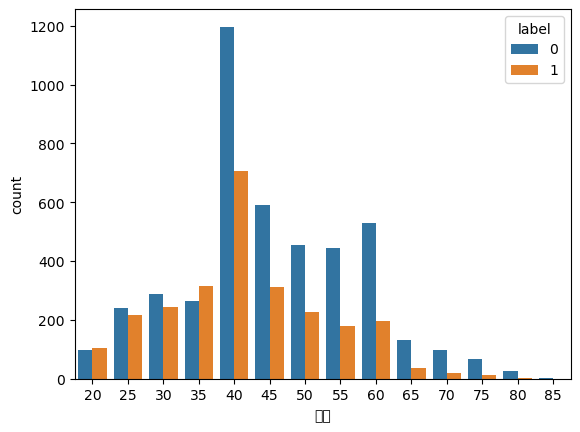

In [215]:
sns.countplot(data=df, x='나이', hue='label')

In [204]:
import numpy as np

In [ ]:
age_bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']
df['age_group'] = pd.cut(df['나이'], bins=age_bins, labels=age_labels, right=False)

BMI_bins = [0, 18.5, 24.9, 29.9, 34.9, 39.9, 100]
BMI_labels = ['Underweight', 'Normal weight', 'Overweight', 'Obesity I', 'Obesity II', 'Obesity III']
df['BMI_group'] = pd.cut(df['BMI'], bins=BMI_bins, labels=BMI_labels, right=False)
df['나이별_BMI구간'] = df['age_group'].astype(str) + '_' + df['BMI_group'].astype(str)

print(df[['나이', 'BMI', 'age_group', 'BMI_group', '나이별_BMI구간']])

      나이    BMI age_group      BMI_group            나이별_BMI구간
0     35  24.22     30-39  Normal weight  30-39_Normal weight
1     40  24.44     40-49  Normal weight  40-49_Normal weight
2     60  17.30     60-69    Underweight    60-69_Underweight
3     40  20.00     40-49  Normal weight  40-49_Normal weight
4     55  27.06     50-59     Overweight     50-59_Overweight
...   ..    ...       ...            ...                  ...
6995  25  22.49     20-29  Normal weight  20-29_Normal weight
6996  60  23.88     60-69  Normal weight  60-69_Normal weight
6997  40  30.86     40-49      Obesity I      40-49_Obesity I
6998  60  24.44     60-69  Normal weight  60-69_Normal weight
6999  50  23.88     50-59  Normal weight  50-59_Normal weight

[7000 rows x 5 columns]


In [235]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [246]:
X = df[['나이', 'BMI', '혈압', '혈청 크레아티닌']]  # 예시 컬럼명

# 2) 상수항(constant) 추가
X_const = add_constant(X)

# 3) VIF 계산
vif_df = pd.DataFrame()
vif_df['변수'] = X_const.columns
vif_df['VIF'] = [
    variance_inflation_factor(X_const.values, i)
    for i in range(X_const.shape[1])
]

print(vif_df)

         변수        VIF
0     const  93.102244
1        나이   1.058224
2       BMI   1.071440
3        혈압   1.062749
4  혈청 크레아티닌   1.056099


In [248]:
corr = df[['나이', 'BMI', '혈압', '혈청 크레아티닌']].corr()
print(corr)

                나이       BMI        혈압  혈청 크레아티닌
나이        1.000000 -0.071149  0.166057 -0.145208
BMI      -0.071149  1.000000  0.164654  0.188382
혈압        0.166057  0.164654  1.000000  0.020131
혈청 크레아티닌 -0.145208  0.188382  0.020131  1.000000


In [249]:
df

,ID,나이,키(cm),몸무게(kg),BMI,시력,충치,공복 혈당,혈압,중성 지방,...,고밀도지단백,저밀도지단백,헤모글로빈,요 단백,간 효소율,label,위험군,age_group,BMI_group,나이별_BMI구간
0,TRAIN_0000,35,170,70,24.22,1.10,1,98,40,80,...,75,120,15.9,1,1.53,1,고위험군,30-39,Normal weight,30-39_Normal weight
1,TRAIN_0001,40,150,55,24.44,1.00,0,173,39,104,...,46,184,11.8,1,1.45,0,고위험군,40-49,Normal weight,40-49_Normal weight
2,TRAIN_0002,60,170,50,17.30,0.75,0,96,40,61,...,43,89,15.3,1,1.04,0,고위험군,60-69,Underweight,60-69_Underweight
3,TRAIN_0003,40,150,45,20.00,0.50,0,92,40,46,...,66,110,13.4,1,1.18,0,고위험군,40-49,Normal weight,40-49_Normal weight
4,TRAIN_0004,55,155,65,27.06,1.00,0,87,42,95,...,62,151,13.8,1,1.32,0,고위험군,50-59,Overweight,50-59_Overweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,TRAIN_6995,25,170,65,22.49,1.50,0,87,45,141,...,44,112,14.9,1,1.50,0,저위험군,20-29,Normal weight,20-29_Normal weight
6996,TRAIN_6996,60,165,65,23.88,0.90,0,87,45,82,...,64,103,14.3,1,1.47,1,고위험군,60-69,Normal weight,60-69_Normal weight
6997,TRAIN_6997,40,180,100,30.86,1.20,0,97,44,87,...,54,107,15.6,1,1.00,0,고위험군,40-49,Obesity I,40-49_Obesity I
6998,TRAIN_6998,60,150,55,24.44,0.60,0,89,57,161,...,49,76,14.4,1,1.00,0,고위험군,60-69,Normal weight,60-69_Normal weight


In [1]:
import pandas as pd
import numpy as np
import random
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
plt.rcParams['font.family'] = 'Apple SD Gothic Neo'
plt.rcParams['axes.unicode_minus'] = False

In [9]:
X = df.drop(['ID', 'label',], axis = 1)
y = df['label']

x_test = test.drop('ID', axis = 1)

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [10]:

model = SVC(random_state=42, probability=True,
            kernel='linear',
            C=1,
            degree=2,
            tol=0.003)

model.fit(X_train, y_train)

test_acc = accuracy_score(y_valid, model.predict(X_valid))
print("Test Accuracy:", test_acc)

KeyboardInterrupt: 

In [ ]:
pred = model.predict(x_test)
submit = pd.read_csv('sample_submission.csv')
submit['label'] = pred
submit.head()
submit.to_csv('submission.csv', index = False)